In [1]:
import threading
import time

In [8]:
def threading_test(name):
    print(f'Background process started with {name}')
    time.sleep(3)
    print(f'Background thread finished')



Main thread finishes before the background thread is complete

In [9]:
if __name__ == '__main__':

    print(f'Am the main thread')
    t = threading.Thread(target = threading_test, args = ["Kapoorlabs"])
    t.start()
    # Main thread is not waiting for background thread to finish
    
    print(f'Main ended')

Am the main thread
Background process started with Kapoorlabs
Main ended


Add daemon to kill the background thread

In [10]:
if __name__ == '__main__':

    print(f'Am the main thread')
    t = threading.Thread(target = threading_test, args = ["Kapoorlabs"], daemon = True)
    t.start()
    # Main thread is not waiting for background thread to finish
    
    print(f'Main ended')

Am the main thread
Background process started with Kapoorlabs
Main ended


Use join() to wait for the background thread to finish execution

In [25]:
if __name__ == '__main__':

    print(f'Am the main thread')
    t = threading.Thread(target = threading_test, args = ["Kapoorlabs"])
  
    t.start()
    #Wait for background thread to finish
    t.join()
    print(f'Main ended')


Am the main thread
<locked _thread.lock object at 0x0000013EBB30D1B0>
<unlocked _thread.lock object at 0x0000013EBB30D1B0>
Background process started with Kapoorlabs
Background thread finished
Main ended


In [8]:
import concurrent.futures
import os

In [19]:
if __name__ == '__main__':
    nthreads = os.cpu_count()
    print(f'Available number of cpu {nthreads}')
    with concurrent.futures.ThreadPoolExecutor(max_workers = nthreads) as executor:
        executor.map(threading_test, ['Kapoorlabs', 'Paris', 'Berlin', 'India'])

Available number of cpu 16
Background process started with Kapoorlabs
Background process started with Paris
Background process started with Berlin
Background process started with India
Background thread finished
Background thread finished
Background thread finished
Background thread finished


In [26]:
if __name__ == '__main__':
    nthreads = os.cpu_count()
    print(f'Available number of cpu {nthreads}')
    with concurrent.futures.ThreadPoolExecutor(max_workers = nthreads) as executor:
        executor.submit(threading_test, ['Kapoorlabs', 'Paris', 'Berlin', 'India'])
    

Available number of cpu 16
Background process started with ['Kapoorlabs', 'Paris', 'Berlin', 'India']
Background thread finished


In [25]:
import numpy as np
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.util import map_array
import time
from skimage import data, filters, measure, morphology
import matplotlib.pyplot as plt
def relabel_map(image,  current_label):

    image[current_label] = 0
    
    return image

def threshold_and_show(image):
        
        threshold = filters.threshold_otsu(image)
        mask = image > threshold
        mask = morphology.remove_small_objects(mask, 50)
        mask = morphology.remove_small_holes(mask, 50)
        label_img = measure.label(mask)
        plt.imshow(label_img)
        plt.show()
        properties = regionprops(label_img)
        current_labels = [prop.label for prop in properties ]
        replace_labels = current_labels 
        return replace_labels,label_img


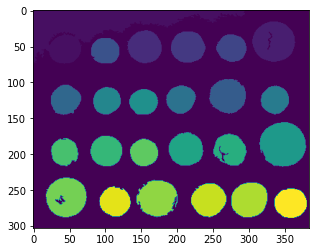

Total execution time 0.09099245071411133


In [26]:
from queue import Queue
import threading
if __name__ == '__main__':
        starttime = time.time()
        
        
        image = data.coins()
        return_labels, label_img = threshold_and_show(image)
        for new_label in return_labels:
              t = threading.Thread(target = relabel_map, args = [label_img, new_label])
              t.start()
              t.join()

              
              
             
              
        endtime = time.time()

        print(f'Total execution time {endtime - starttime}')

        

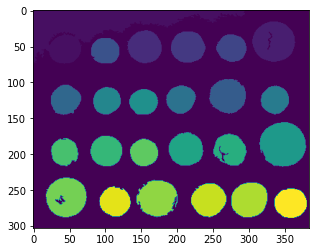

Available number of cpu 16
Total execution time 0.0860135555267334
Available number of cpu 1
Total execution time 0.00099945068359375


In [27]:
#Now let us try multiprocessing for splitting the jobs that requires multiple cpus

if __name__ == '__main__':
        starttime = time.time()
        image = data.coins()
        return_labels, label_img = threshold_and_show(image) 
        nthreads = os.cpu_count()

        print(f'Available number of cpu {nthreads}')
        with concurrent.futures.ThreadPoolExecutor(max_workers = nthreads) as executor:
            futures = []
            for new_label in return_labels:
              futures.append(executor.submit(relabel_map, image = label_img, current_label = new_label ))
            for future in concurrent.futures.as_completed(futures):
                   newimage = future.result()
              
        endtime = time.time()

        print(f'Total execution time {endtime - starttime}')

        starttime = time.time()
        
        nthreads = 1
        print(f'Available number of cpu {nthreads}')
        with concurrent.futures.ThreadPoolExecutor(max_workers = nthreads) as executor:
            futures = []
            for new_label in return_labels:
              futures.append(executor.submit(relabel_map, image = label_img, current_label = new_label ))
            for future in concurrent.futures.as_completed(futures):
                   newimage = future.result()
                  
        endtime = time.time()

        print(f'Total execution time {endtime - starttime}')

In [ ]:
from pathlib import Path
import concurrent
from tifffile import imread, imwrite
inputdir = Path('/path/to/dir/')
outputdir = '/string/path/to/dir/'
pattern = '*.tif'
files = list(inputdir.glob(pattern))
nthreads = os.cpu_count()
def channelizer(file):
    image = imread(file)
    if(len(image.shape)==2):
          newimage = np.zeros([image.shape[0], image.shape[1], 3])
          for i in range(3):
              newimage[:,:,i] = image
    else:
        newimage = image

    return newimage, file.name   
with concurrent.futures.ThreadPoolExecutor(max_workers = nthreads) as executor:
     futures = []
     for fname in files:
         futures.append(executor.submit(channelizer, fname = fname))
     for future in concurrent.futures.as_completed(futures):
                   newimage, name = future.result()
                   imwrite(outputdir + '/' + os.path.splitext(name)[0] + '.tiff', newimage)
